<a href="https://colab.research.google.com/github/Shahida-Rimu/Simulation-and-Modeling/blob/main/Assin_7(Rimu_1091).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = {'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        'Exam_Score': [93, 83, 69, 62, 75, 93, 73, 77, 65, 65, 78, 90, 94, 78, 57, 76, 56, 78, 84, 92]}

df = pd.DataFrame(data)

display(df)

,Student_ID,Exam_Score
0,1,93
1,2,83
2,3,69
3,4,62
4,5,75
5,6,93
6,7,73
7,8,77
8,9,65
9,10,65


In [2]:
mean_score = df['Exam_Score'].mean()
population_variance = df['Exam_Score'].var(ddof=0)
sample_variance = df['Exam_Score'].var(ddof=1)
population_std_dev = df['Exam_Score'].std(ddof=0)
sample_std_dev = df['Exam_Score'].std(ddof=1)

print(f"Mean Exam Score: {mean_score:.2f}")
print(f"Population Variance: {population_variance:.2f}")
print(f"Sample Variance: {sample_variance:.2f}")
print(f"Population Standard Deviation: {population_std_dev:.2f}")
print(f"Sample Standard Deviation: {sample_std_dev:.2f}")

Mean Exam Score: 76.90
Population Variance: 136.09
Sample Variance: 143.25
Population Standard Deviation: 11.67
Sample Standard Deviation: 11.97


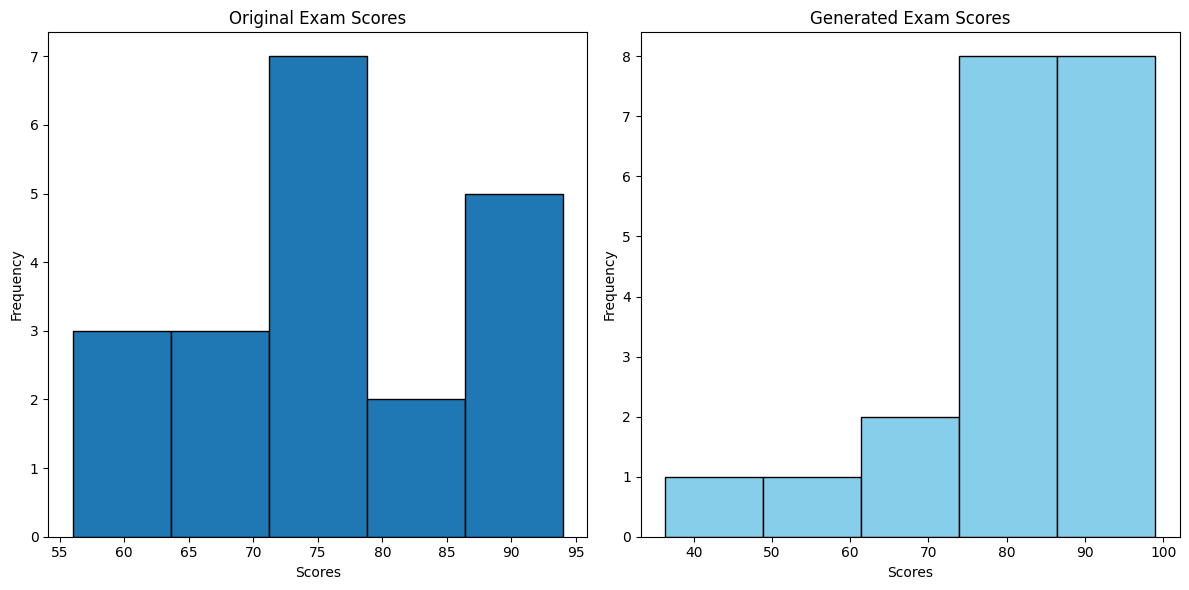

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data using the calculated mean and sample standard deviation
generated_scores = np.random.normal(loc=mean_score, scale=sample_std_dev, size=20)

# Create histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].hist(df['Exam_Score'], bins=5, edgecolor='black')
axes[0].set_title('Original Exam Scores')
axes[0].set_xlabel('Scores')
axes[0].set_ylabel('Frequency')

axes[1].hist(generated_scores, bins=5, edgecolor='black', color='skyblue')
axes[1].set_title('Generated Exam Scores')
axes[1].set_xlabel('Scores')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [4]:
# Monte Carlo Simulation
num_simulations = 100000
simulated_scores = np.random.normal(loc=mean_score, scale=sample_std_dev, size=num_simulations)

# Estimate the probability of scoring >= 75
probability_75_or_higher = np.sum(simulated_scores >= 75) / num_simulations

print(f"Estimated probability of scoring >= 75: {probability_75_or_higher:.4f}")

Estimated probability of scoring >= 75: 0.5626


Null hypothesis mean: 91
T-statistic: -5.27
P-value: 0.0000
Conclusion: Reject the null hypothesis. The average exam score is significantly different from 91.


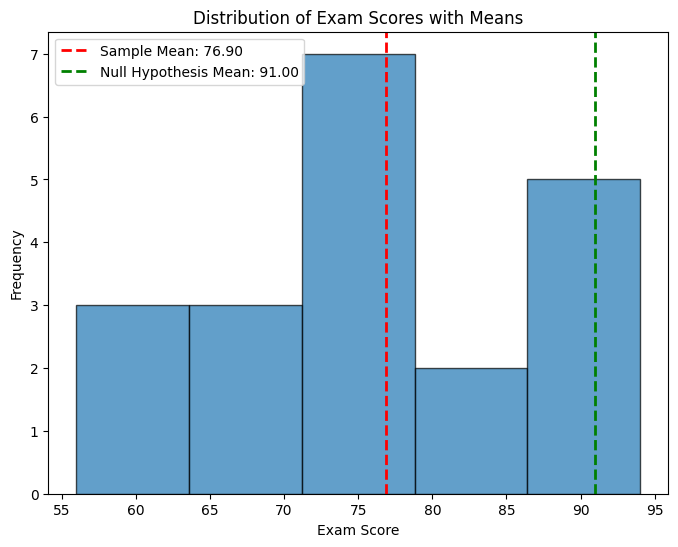

In [5]:
from scipy import stats

# Calculate the null hypothesis value
last_3_digits = 91 # Replace with the actual last 3 digits of your ID
null_hypothesis_mean = (last_3_digits % 50) + 50
print(f"Null hypothesis mean: {null_hypothesis_mean}")

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['Exam_Score'], null_hypothesis_mean)

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Report conclusion
alpha = 0.05
if p_value < alpha:
    print(f"Conclusion: Reject the null hypothesis. The average exam score is significantly different from {null_hypothesis_mean}.")
else:
    print(f"Conclusion: Fail to reject the null hypothesis. There is no significant evidence that the average exam score is different from {null_hypothesis_mean}.")

# Visualize the t-test result
plt.figure(figsize=(8, 6))
plt.hist(df['Exam_Score'], bins=5, edgecolor='black', alpha=0.7)
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=2, label=f'Sample Mean: {mean_score:.2f}')
plt.axvline(null_hypothesis_mean, color='green', linestyle='dashed', linewidth=2, label=f'Null Hypothesis Mean: {null_hypothesis_mean:.2f}')
plt.title('Distribution of Exam Scores with Means')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()